# **Explainer Notebook - Game of Thrones**

Made by: Nicolaj Westergaard (s183970), Simon Schneider (s194248) & Kristine Loft (s194261)

Link to Github Repository: https://github.com/kpl1999/compsoc.git 

In [1]:
# import libraries
import json
import pandas as pd
import numpy as np
import netwulf as nw
import matplotlib.pyplot as plt
import networkx as nx
import random as random 
pd.set_option('display.max_colwidth', None)

## **1. Motivation**

##### **What is your dataset?**
We have chosen to focus on the TV-series *Game of Thrones*, which is known for its complex social structure. 


In [9]:
#### Character data ####
# read character.json file
with open('data/characters.json') as f:
    data_characters = json.load(f)

# convert json to dataframe where each row is a character and each column is a key
df_characters = pd.DataFrame(data_characters['characters'])

# remove rows with no character link (these are book characters)
df_characters = df_characters[df_characters['characterLink'].notnull()]

# remove characterImageThumb, characterImageFull, marriedEngaged, kingsguard, guardedBy, servedBy, guardianOf (not relevant for this project)
df_characters = df_characters.drop(['characterImageThumb', 'characterImageFull', 'marriedEngaged', 'kingsguard', 'guardedBy', 'servedBy', 'guardianOf'], axis=1)

# print size of dataframe
print("Size of dataset:", df_characters.shape)
df_characters.head()

Size of dataset: (368, 18)


,characterName,characterLink,actorName,actorLink,houseName,royal,parents,siblings,killedBy,nickname,killed,parentOf,serves,actors,allies,abductedBy,abducted,sibling
0,Addam Marbrand,/character/ch0305333/,B.J. Hogg,/name/nm0389698/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aeron Greyjoy,/character/ch0540081/,Michael Feast,/name/nm0269923/,Greyjoy,NaN,NaN,"[Balon Greyjoy, Euron Greyjoy]",NaN,Damphair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aerys II Targaryen,/character/ch0541362/,David Rintoul,/name/nm0727778/,Targaryen,True,NaN,[Rhaella Targaryen],[Jaime Lannister],The Mad King,"[Brandon Stark, Rickard Stark]","[Daenerys Targaryen, Rhaegar Targaryen, Viserys Targaryen]",NaN,NaN,NaN,NaN,NaN,NaN
4,Akho,/character/ch0544520/,Chuku Modu,/name/nm6729880/,NaN,NaN,NaN,NaN,[Daario Naharis],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alliser Thorne,/character/ch0246938/,Owen Teale,/name/nm0853583/,NaN,NaN,NaN,NaN,[Jon Snow],NaN,[Jon Snow],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#### Episode data ####

# read episodes.json file
with open('data/episodes.json') as f:
    data_episodes = json.load(f)

# convert json to dataframe where each row is an scene and each column is a key
df_episodes = pd.DataFrame(data_episodes['episodes'])

# explode scenes column
df_episodes = df_episodes.explode('scenes')

# extract all scenes from the dataframe and create a new dataframe
df_scenes = pd.DataFrame(df_episodes['scenes'].tolist())

# make a list of episode numbers
episodeNum = []
seasonNum = []
for i in range(len(df_episodes)):
    episodeNum.append(df_episodes.iloc[i]['episodeNum'])
    seasonNum.append(df_episodes.iloc[i]['seasonNum'])

df_scenes['episodeNumber'] = episodeNum
df_scenes['seasonNumber'] = seasonNum

# remove greensight, altLocation, warg and flashback columns
df_scenes = df_scenes.drop(['greensight', 'altLocation', 'warg', 'flashback'], axis=1)
df_scenes.head()

# in the characters column, extract the name of each character and add it to a list
characters = []
for i in range(len(df_scenes)):
    characters.append([])
    for j in range(len(df_scenes['characters'][i])):
        characters[i].append(df_scenes['characters'][i][j]['name'])

# add the list of characters to the dataframe
df_scenes['characters'] = characters

# print size of dataframe
print("Size of dataset:", df_scenes.shape)
df_scenes.head()

Size of dataset: (4165, 7)


,sceneStart,sceneEnd,location,subLocation,characters,episodeNumber,seasonNumber
0,0:00:40,0:01:45,The Wall,Castle Black,"[Gared, Waymar Royce, Will]",1,1
1,0:01:45,0:03:24,North of the Wall,The Haunted Forest,"[Gared, Waymar Royce, Will]",1,1
2,0:03:24,0:03:31,North of the Wall,The Haunted Forest,"[Will, Wight Wildling Girl]",1,1
3,0:03:31,0:03:38,North of the Wall,The Haunted Forest,[Will],1,1
4,0:03:38,0:03:44,North of the Wall,The Haunted Forest,[],1,1


#####  **Why did you choose this/these particular dataset(s)?**

#####  **What was your goal for the end user’s experience?**

The goal was to display and analysis the social structure in the 

## **2. Basic stats. Let’s understand the dataset better**

##### **Write about your choices in data cleaning and preprocessing**

--TODO

In [ ]:
# as seen in the previous section. 

##### **Write a short section that discusses the dataset stats**


In [54]:
# Basic statistics of the character dataset
print("Number of characters:", len(df_characters))
print("Number of characters with a house:", len(df_characters[df_characters['houseName'].notnull()]))

Number of characters: 368
Number of characters with a house: 72


In [52]:
#### Basic statistics of the scene dataset ####
print("Number of scenes:", len(df_scenes))

# number of characters in scene dataset
characters = []
for i in range(len(df_scenes)):
    for j in range(len(df_scenes['characters'][i])):
        characters.append(df_scenes['characters'][i][j])

print("Number of characters in scene dataset:", len(set(characters)))

# average number of characters per scene
print("Average number of characters per scene:", round(df_scenes['characters'].str.len().mean(), 2))
# count number of scenes per character
scenes_per_character = {}
for i in range(len(df_scenes)):
    for character in df_scenes['characters'][i]:
        if character in scenes_per_character:
            scenes_per_character[character] += 1
        else:
            scenes_per_character[character] = 1

# sort the dictionary by value
scenes_per_character = {k: v for k, v in sorted(scenes_per_character.items(), key=lambda item: item[1], reverse=True)}
# print average number of scenes per character
print("Average number of scenes per character:", round(np.mean(list(scenes_per_character.values())), 2))

Number of scenes: 4165
Number of characters in scene dataset: 577
Average number of characters per scene: 2.91
Average number of scenes per character: 20.99


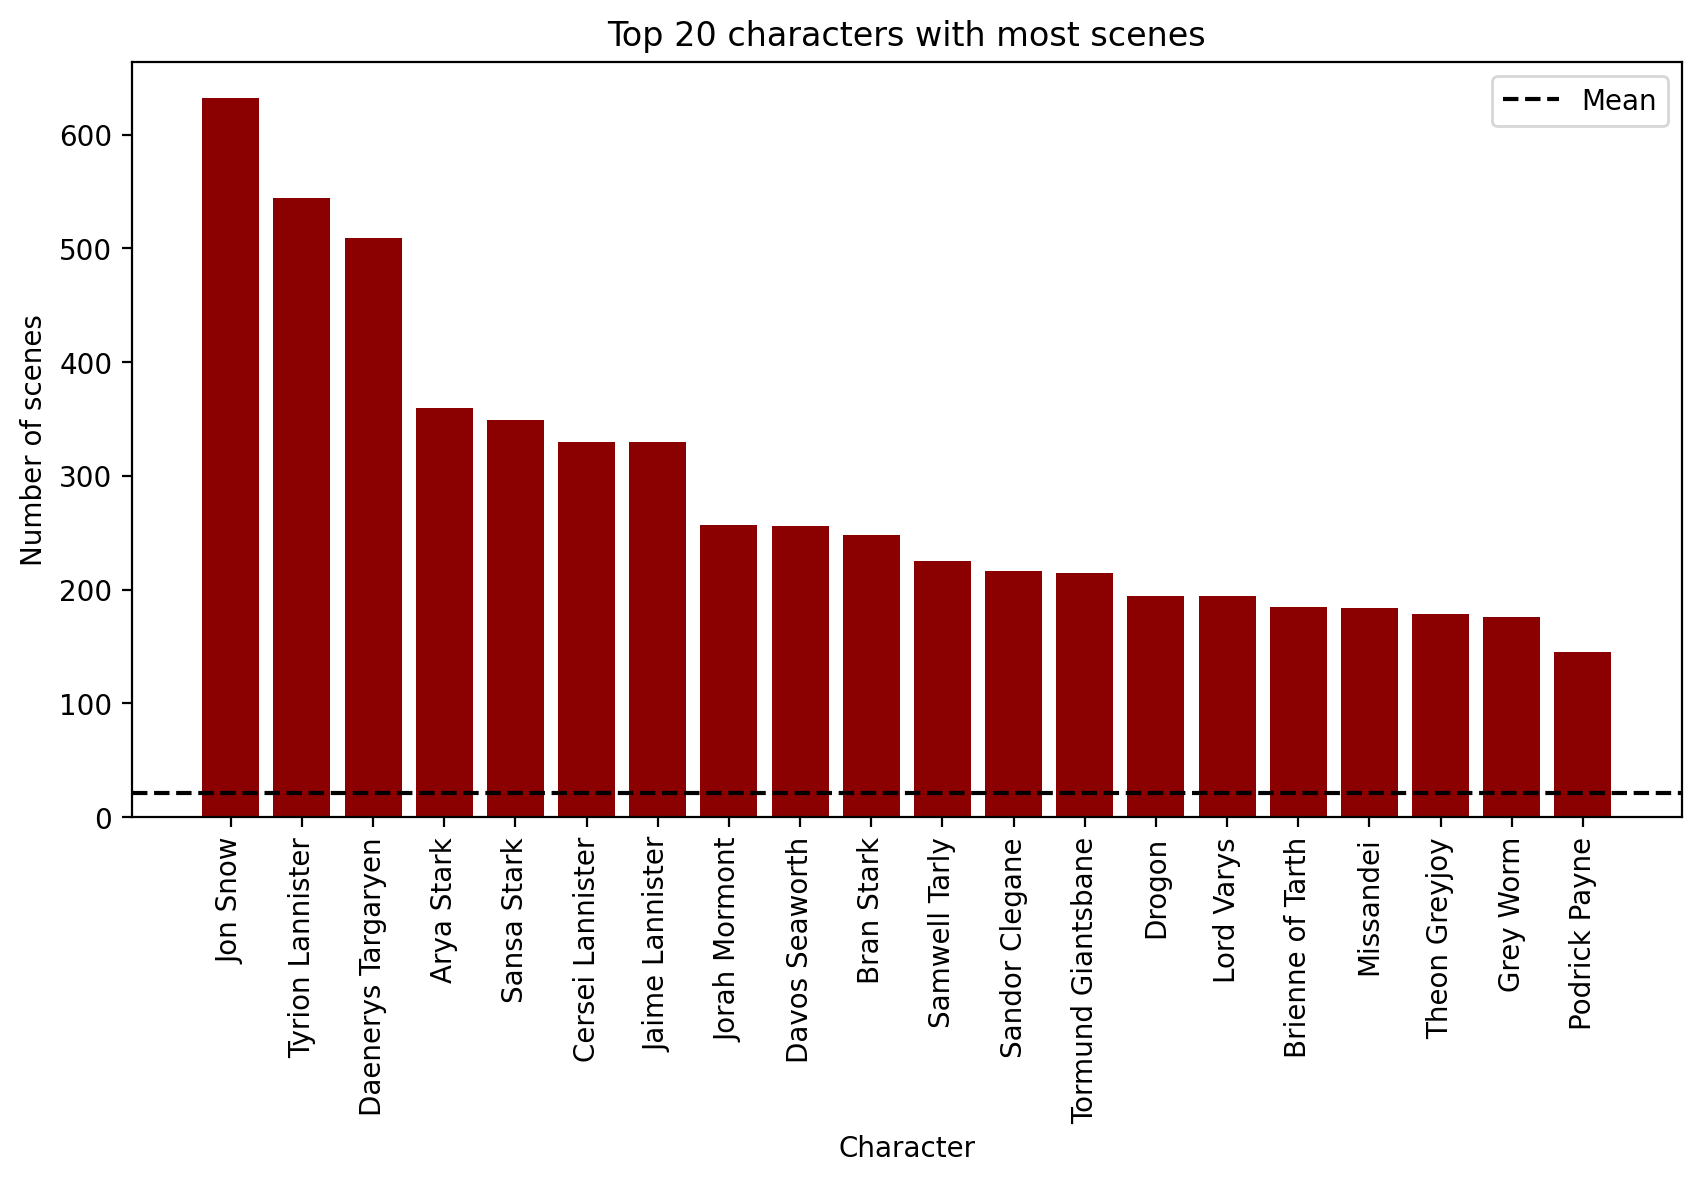

In [53]:
# plot the top 20 characters with most scenes
plt.figure(figsize=(10, 5), dpi=200)
plt.bar(list(scenes_per_character.keys())[:20], list(scenes_per_character.values())[:20], color='darkred')
# add the mean as a horizontal line
plt.axhline(y=np.mean(list(scenes_per_character.values())), color='black', linestyle='--')
plt.xticks(rotation=90)
plt.xlabel("Character")
plt.ylabel("Number of scenes")
plt.title("Top 20 characters with most scenes")
# add legend
plt.legend(["Mean"])
plt.show()

In [ ]:
#### Basic statistics of the script dataset ####

-TODO-

## **3. Tools, theory and analysis. Describe the process of theory to insight**


##### **Talk about how you’ve worked with text, including regular expressions, unicode, etc.**


##### **Describe which network science tools and data analysis strategies you’ve used, how those network science measures work, and why the tools you’ve chosen are right for the problem you’re solving.**

In [ ]:
# constructing the network


##### **How did you use the tools to understand your dataset?**

## **4. Discussion. Think critically about your creation.**

##### **What went well?**

##### **What is still missing? What could be improved? Why?**